Imports

In [1]:
import sys
sys.path.append('/Users/aohma/BCSS-DAG Dropbox/Anders Ohma/python/git')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import secsy as cs

import warnings
warnings.filterwarnings('ignore')

Make a cubed sphere grid

In [2]:
location = (12,70)
orientation = 45
L, W, Lres, Wres = 6000,7500,100,100

projection = cs.CSprojection(location,45)
grid = cs.CSgrid(projection, L, W, Lres, Wres)

Make a satellite trajectory with some random data

In [3]:
minlat = 50
x = np.linspace(-1,1,50)
y = np.linspace(0.8,-0.1,50)

sat = pd.DataFrame()
sat['lat'] = 90 - np.sqrt(x**2 + y**2)*(90. - minlat)
sat['lon'] = np.rad2deg(np.arctan2(x,y))
sat['data'] = np.random.normal(size=50)

Plot the trajectory with different grids

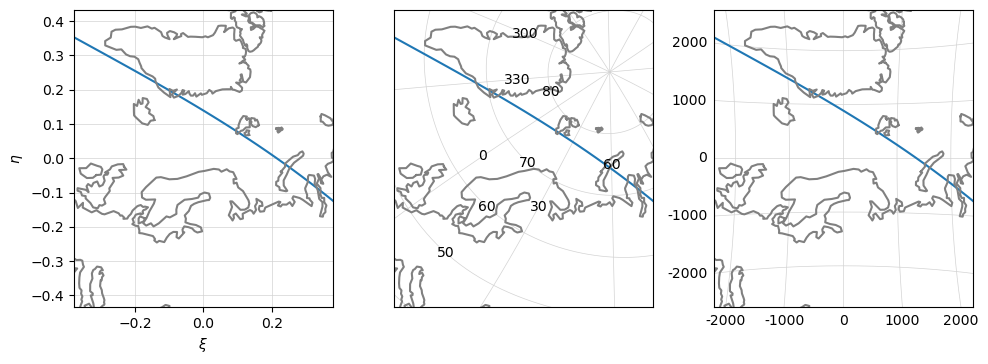

In [4]:
fig,axs = plt.subplots(1,3,figsize=(10,4))
csax0 = cs.CSplot(axs[0],grid,gridtype='cs')
csax0.plot(sat['lon'],sat['lat'])
csax0.add_coastlines(color='grey')

csax1 = cs.CSplot(axs[1],grid,gridtype='geo')
csax1.plot(sat['lon'],sat['lat'])
csax1.add_coastlines(color='grey')

csax2 = cs.CSplot(axs[2],grid,gridtype='km')
csax2.plot(sat['lon'],sat['lat'])
csax2.add_coastlines(color='grey')
fig.tight_layout()

Plotting data in all grid cells

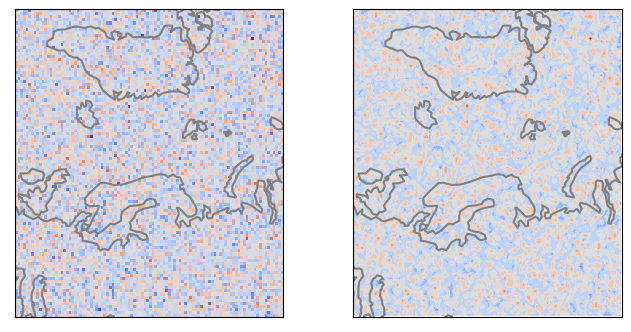

In [5]:
C = np.random.normal(size=grid.shape)

fig,axs = plt.subplots(1,2,figsize=(8,4))
csax0 = cs.CSplot(axs[0],grid)
csax0.pcolormesh(C,cmap='coolwarm')
csax0.add_coastlines(color='grey')

csax1 = cs.CSplot(axs[1],grid)
csax1.contourf(C,cmap='coolwarm')
csax1.add_coastlines(color='grey')

It is also possible to plot data on custom grids

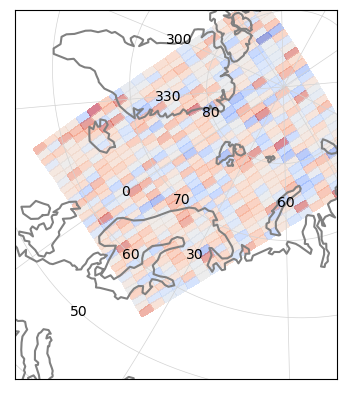

In [6]:
C = np.random.normal(size=(20,30))
X,Y = np.meshgrid(np.linspace(-0.3,0.4,31),np.linspace(0.8,-0.1,21))
lat = 90 - np.sqrt(X**2 + Y**2)*(90. - minlat)
lon = np.rad2deg(np.arctan2(X,Y))

fig,ax = plt.subplots()
csax = cs.CSplot(ax,grid,gridtype='geo')
csax.pcolormesh(lon,lat,C,cmap='coolwarm',alpha=0.5)
csax.add_coastlines(color='grey')

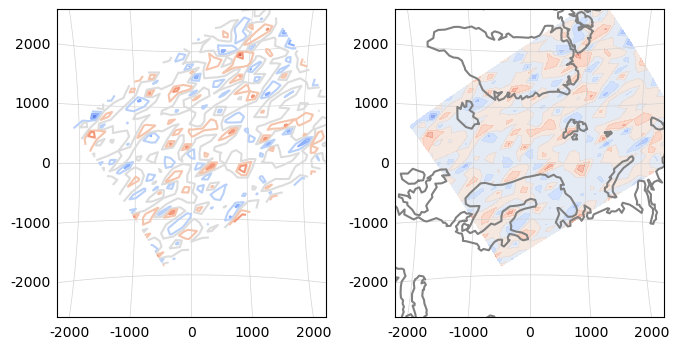

In [15]:
C = np.random.normal(size=(20,30))
X,Y = np.meshgrid(np.linspace(-0.3,0.4,30),np.linspace(0.8,-0.1,20))
lat = 90 - np.sqrt(X**2 + Y**2)*(90. - minlat)
lon = np.rad2deg(np.arctan2(X,Y))

fig,axs = plt.subplots(1,2,figsize=(8,4))
csax0 = cs.CSplot(axs[0],grid,gridtype='km')
csax0.contour(lon,lat,C,cmap='coolwarm')

csax1 = cs.CSplot(axs[1],grid,gridtype='km')
csax1.contourf(lon,lat,C,cmap='coolwarm',alpha=0.5)
csax1.add_coastlines(color='grey')